# Introduction

This notebook is designed to assess your skills in working with databases and data analysis using the Student Success Analytics Team's preferred tech stack: SQL and Python.

Please note that this is a general assessment intended to help us understand your strengths. You are welcome to skip questions. Incomplete assessments will **not** disqualify you from consideration for the position. If you have any questions or need clarification, do not hesitate to contact us. We want you to succeed and will do our best to support you!

Once you are done, follow the instructions at the end of the notebook and in the README.md file in the repository where this notebook is located to submit your assessment. Good luck!

# Overview of `university.db`

The `university.db` database is a mock SQLite database designed to simulate a collection of university data tables. It contains information about students, instructors, courses, grades, and more. This database is structured to provide realistic data for training purposes, assessing potential hires, and conducting exploratory data analysis.

## Database Schema

The database consists of the following tables:

### 1. **`student_main`**
- **Description**: Contains details of students enrolled at the university.
- **Key Columns**:
  - `student_id`: Unique identifier for each student (primary key).
  - `last_name`, `first_name`: Student's name details.
  - `gender`, `ethnicity`: Demographic information.
  - `address`, `us_citizen`, `us_resident`, `state_resident`: Residential and citizenship details.
  - `pell_recipient`, `us_veteran`: Indicators for Pell Grant recipients and veteran status.

### 2. **`instructor_main`**
- **Description**: Stores details about university instructors.
- **Key Columns**:
  - `employee_id`: Unique identifier for each instructor (primary key).
  - `faculty_code`: Foreign key referencing `faculty_code_validation_table.faculty_code`, representing the type of faculty (e.g., tenure-track, adjunct).
  - `full_time_indicator`: Binary indicator for full-time (1) or part-time (0) status.

### 3. **`faculty_code_validation_table`**
- **Description**: Lookup table for validating `faculty_code` values.
- **Key Columns**:
  - `faculty_code`: Three-letter code for faculty type (primary key).
  - `faculty_description`: Description of the faculty type.

### 4. **`courses`**
- **Description**: Represents courses offered at the university.
- **Key Columns**:
  - `id`: Unique identifier for each course (primary key).
  - `term_code`: Academic term (e.g., Fall 2023).
  - `major_abbreviation`: Department offering the course (e.g., MATH, BIO).
  - `course_number`, `section_code`: Course and section identifiers.
  - `employee_id`: Foreign key referencing `instructor_main.employee_id`, indicating the instructor teaching the course.
  - `delivery_code`: Mode of instruction (In-person, Hybrid, Online).
- **Relationships**:
  - Linked to `instructor_main` through `employee_id`.

### 5. **`student_grades`**
- **Description**: Records grades earned by students in various courses.
- **Key Columns**:
  - `id`: Unique identifier for each grade record (primary key).
  - `student_id`: Foreign key referencing `student_main.student_id`.
  - `section_code`: Foreign key referencing `courses.section_code`.
  - `gpa`: Grade point average for the course.
  - `withdrawal`: Binary indicator for course withdrawal (1 for withdrawal, 0 otherwise).

### 6. **`student_attributes`**
- **Description**: Tracks additional attributes assigned to students.
- **Key Columns**:
  - `id`: Unique identifier for each attribute record (primary key).
  - `student_id`: Foreign key referencing `student_main.student_id`.
  - `term_code`: Academic term for the attribute.
  - `attribute_code`: Foreign key referencing `attribute_code_validation_table.attribute_code`, indicating the assigned attribute (e.g., ESL, Honors).

### 7. **`attribute_code_validation_table`**
- **Description**: Lookup table for validating `attribute_code` values.
- **Key Columns**:
  - `attribute_code`: Three-letter code for student attributes (primary key).
  - `attribute_description`: Description of the attribute.


## Relationships Between Tables

The tables and relationships in the `university.db` database are related as follows:

![University Database Schema](schema_diagram.png)


### Introduction to Pandas and the `read_sql` Method

**Pandas** is a powerful Python library for data manipulation and analysis. It provides easy-to-use data structures like DataFrames and Series, which allow for efficient handling and processing of structured data. Pandas is widely used in data science, machine learning, and data analytics.

One of Pandas' strengths is its ability to seamlessly interact with SQL databases, enabling you to load query results directly into a DataFrame using the `read_sql` method. This method simplifies the process of querying databases and analyzing the results in Python.

#### What is `read_sql`?
The `pandas.read_sql()` method allows you to execute SQL queries on a database and retrieve the results as a Pandas DataFrame. It can be used to:
1. Query data from a database.
2. Load entire tables into a DataFrame.
3. Perform complex SQL queries and integrate results with Python-based analysis.

#### Basic Syntax
```python
pandas.read_sql(sql, con, index_col=None, coerce_float=True, params=None)
```

- **`sql`**: The SQL query or table name as a string.
- **`con`**: A database connection object (e.g., SQLAlchemy engine).
- **`index_col`**: Column(s) to set as the DataFrame index (optional).
- **`params`**: Parameters to pass for parameterized queries (optional).

#### Benefits of Using `read_sql`
- Directly integrates SQL querying into your Python workflow.
- Returns a DataFrame, which is ideal for further analysis and visualization in Python.
- Supports parameterized queries for added security and flexibility.

#### Documentation
For a complete guide to the `read_sql` method, visit the [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html). 

This page provides detailed explanations, parameters, and examples to help you make the most of this method.

In [15]:
# Run the following cell for an example how to use `pd.read_sql`

import pandas as pd
from sqlalchemy import create_engine

# Define the database URL
DATABASE_URL = "sqlite:///university.db"

# Create the engine to connect to the database
engine = create_engine(DATABASE_URL)

# Test the connection by running a query to get table names
query = "SELECT name FROM sqlite_master where type = 'table';"
tables = pd.read_sql(query, engine)

# Print the list of tables
print("Connected to the database!")
print("Tables in the database:")
display(tables)

Connected to the database!
Tables in the database:


,name
0,student_main
1,faculty_code_validation_table
2,attribute_code_validation_table
3,instructor_main
4,student_attributes
5,courses
6,student_grades


### Count the Total Number of Students

#### Directions:
Write a SQL query in the space provided below to count the total number of students in the database. Use the `student_main` table for this task. Then run the cell to execute your query and display the result.

In [16]:
## Complete the query to get the number of students in the `students` table
student_count_query = "SELECT COUNT(*) AS count FROM student_main;"

## Do not edit the code below
student_count_df = pd.read_sql(student_count_query, engine)

# Display the result
display(student_count_df)

,count
0,10000


### Get All Honors Students in the Spring 2024 Term (202401)

#### Directions:
Write a SQL query in the space provided below to retrieve the details of all students who have the "HNR" attribute in the 202401 term. Use the `student_main` and `student_attributes` tables for this task. Return the student ID, last name, first name, address, and email address (if available). Then run the cell to execute your query and display the result.

In [17]:
## Complete the query to get the `HNR` students in the 202401 term
hnr_students_query = """
SELECT 
    sm.student_id,
    sm.last_name,
    sm.first_name,
    sm.address,
    sm.email
FROM 
    student_main sm
JOIN 
    student_attributes sa
ON 
    sm.student_id = sa.student_id
WHERE 
    sa.term_code = '202401' 
    AND sa.attribute_code = 'HNR';
"""

## Do not edit the code below
hnr_students_df = pd.read_sql(hnr_students_query, engine)

# Display the result
display(hnr_students_df)


,student_id,last_name,first_name,address,email
0,783778786,Strickland,Hannah,"87382 Anthony Gardens Apt. 870, Aprilville, WY...",smithamy@example.org
1,657905652,Williams,Tanner,"9942 Kyle Square Suite 196, North Linda, MH 35479",dduncan@example.net
2,526240027,Wagner,Tyler,"591 Malik Valley Suite 884, West Dawn, NH 03450",pgriffin@example.net
3,399375064,Gomez,Anthony,"5245 Hall Oval Apt. 234, Contrerasborough, GU ...",cynthia32@example.com
4,930206071,Watkins,James,"0066 Adams Flats Suite 830, Rodriguezfort, TN ...",zdyer@example.org
...,...,...,...,...,...
170,151016109,Hall,Jeffrey,"1059 Jacqueline Spur Suite 199, New Paul, IA 8...",marcusgray@example.com
171,668904191,Silva,Mark,"278 Michael Forges Suite 643, West Ricardo, NC...",cassandra39@example.org
172,762024251,Wheeler,Robert,"944 Rodriguez Tunnel Suite 538, Port Judymouth...",alyssasellers@example.com
173,500621734,Harvey,James,"8852 Howe Pines, Lake Joshua, AR 06908",plarson@example.org


### Get the Average GPA for All Students

#### Directions:
Write a SQL query in the space provided below to calculate the average GPA for all students in the database. Use the `student_grades` table to compute this value. Then run the cell to execute your query and display the result.

In [18]:
## Complete the query to get the average GPA of all student grades for all terms

average_gpa_query = "SELECT AVG(gpa) AS average_gpa FROM student_grades;"

## Do not edit the code below
average_gpa_df = pd.read_sql(average_gpa_query, engine)

# Display the result
display(average_gpa_df)

,average_gpa
0,2.884038


### Identify Under Performing Students by GPA in the 2024 Fall Term (202408)

#### Directions:
Write a SQL query in the space provided below to identify the students with GPAs below a 2.0 in the 2024 Fall term (term code: 202408). Use the `student_grades` and `student_main` tables. Include the student's ID, last name, first name, and GPA in your output. Then run the cell to execute your query and display the results.

In [19]:
## Complete the query to get the students with below a 2.0 GPA in the 202408 term

underperforming_students_query = """
SELECT 
    sm.student_id,
    sm.last_name,
    sm.first_name,
    AVG(sg.gpa) AS avg_gpa
FROM 
    student_main sm
JOIN 
    student_grades sg
ON 
    sm.student_id = sg.student_id
WHERE 
    sg.term_code = '202408' 
GROUP BY 
    sm.student_id, sm.last_name, sm.first_name, sg.term_code
HAVING 
    AVG(sg.gpa) < 2.0;
"""

## Do not edit the code below
underperforming_students_df = pd.read_sql(underperforming_students_query, engine)

# Display the result
display(underperforming_students_df.head())

,student_id,last_name,first_name,avg_gpa
0,101279485,Hunt,Thomas,1.580944
1,105051770,Schroeder,Leslie,1.880291
2,105631754,Conner,Benjamin,1.437331
3,113726208,Ramos,Alejandra,1.655689
4,116207678,Osborn,Marilyn,1.961298


## Get the Average Math Course Grades for Each Term Since 2019

#### Directions:
Write a SQL query in the space provided below to calculate the average GPA for all students in CS 1001 courses in the database. Use the `student_grades` and `courses` tables to compute this value. Return the term code and the average GPA, rounded to two places, for math courses in each term. Then run the cell to execute your query and display the results.

In [20]:
## Complete the query to get the average grades for CS 1001 for all terms

average_cs_1001_query = """
SELECT 
    c.term_code,
    ROUND(AVG(sg.gpa), 2) AS average_gpa
FROM 
    student_grades sg
JOIN 
    courses c
ON 
    sg.section_code = c.section_code
WHERE 
    c.major_abbreviation = 'CS'
    AND c.course_number = '1001'
GROUP BY 
    c.term_code
ORDER BY 
    c.term_code;
"""

## Do not edit the code below
average_cs_1001_df = pd.read_sql(average_cs_1001_query, engine)

# Display the result
display(average_cs_1001_df.head())

,term_code,average_gpa
0,202001,2.89
1,202005,2.86
2,202305,2.85
3,202401,2.86


## Create a Bar Plot of Average CS 1001 Grades Over Time

#### Directions:
Using the results from the previous query, create a bar plot showing the average GPA for CS 1001 courses over time. The x-axis should represent the term code, and the y-axis should display the average GPA. Label the axes appropriately and provide a title for the plot. You can use any Python data visualization library you prefer (e.g., Matplotlib, Seaborn, Plotly, etc.).

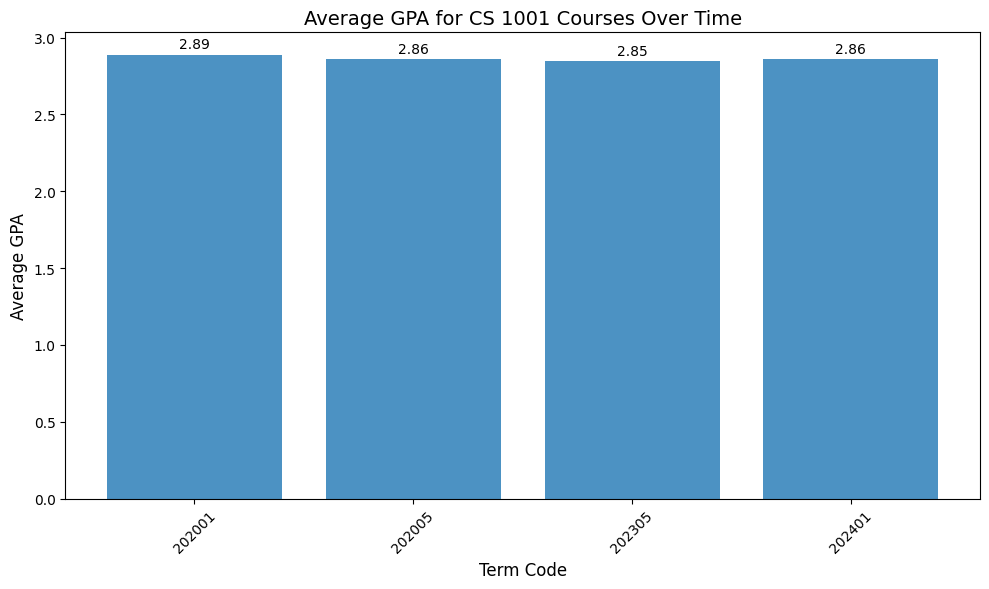

In [21]:
## Complete the code to generate the plot of the average GPA for CS 1001 for all terms

import matplotlib.pyplot as plt

# Extract data from the DataFrame
term_codes = average_cs_1001_df['term_code']
average_gpa = average_cs_1001_df['average_gpa']

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(term_codes, average_gpa, alpha=0.8)

# Label the axes
plt.xlabel('Term Code', fontsize=12)
plt.ylabel('Average GPA', fontsize=12)

# Add a title
plt.title('Average GPA for CS 1001 Courses Over Time', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Add annotations on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.02,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Show the plot
plt.tight_layout()
plt.show()


# Open-ended Analysis

### Directions

In this section, please explore the `university.db` database and conduct any additional analyses you find interesting. This is an opportunity to showcase your skills, creativity, and analytical thinking. Feel free to ask questions, propose new analyses, or present your findings in any format you prefer (e.g., tables, charts, written summaries). Pick one and make up your own question to answer.
0

You can use SQL queries, Python code, data visualizations, or any other tools you find suitable for the task. Your analysis can cover topics like student performance, course enrollment trends, faculty characteristics, or any other aspect of the university data.

### Possible Questions for Analysis

Below are some example questions you might explore. Feel free to modify or expand on these based on your interests:

#### GPA Analysis
- Are there particular **courses**, **instructors**, or **student populations** that have significant deviations in GPA?
- How do **average GPAs** differ across terms, courses, or majors?
- What is the distribution of GPAs for students in honors (HNR) or English as a Second Language (ESL) programs?

#### Enrollment Patterns
- What are the **enrollment patterns** for courses by day and/or time?
- Which courses have the **highest or lowest enrollments** across all terms?
- How do enrollments differ across **delivery modes** (in-person, hybrid, online)?

#### Instructor Impact
- Do specific instructors have consistently **higher or lower average GPAs** in their courses?
- How do full-time versus part-time instructors differ in terms of course GPA outcomes?

#### Term Trends
- Are there any **seasonal trends** in course enrollment or performance (e.g., winter vs. summer)?
- What is the average number of courses taken by students in each term?

#### Student Demographics
- What percentage of students are enrolled in **honors** or **athletic programs** each term?
- How does student performance differ by **gender** or **ethnicity**?

#### Course Specific Analysis
- What is the **most common combination** of courses taken by students in a given term?
- How do **drop/withdrawal rates** vary by course, instructor, or term?

In [22]:
## Your open ended analysis goes here

# Finish

### Submission Instructions
Once you are finished with the analysis, please save the notebook and submit it for review. Follow the detailed instructions in the README.md file in the repository containing this notebook for submission guidelines. If you have any questions or need assistance, feel free to reach out to us. 

We appreciate your time and effort. Good luck, and we look forward to reviewing your work!